In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Inisialisasi libary yang dibutuhkan, library numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib untuk visualisasi, sklearn untuk implementasi atau membangun model linear regression dan polynomial feature 

In [3]:
# Load the dataset from CSV
data = pd.read_csv('FinancialMarket.csv')
data.head()

,x,combined_data
0,0.00000,0.003073
1,0.01001,0.033492
2,0.02002,-0.027269
3,0.03003,0.176319
4,0.04004,-0.006027


Membuka dataset FinancialMarket.csv dan membaca data kolom 5 baris pertama dataset 

In [4]:
# Extract 'x' and 'combined_data' columns from the dataset
x = data['x'].values.reshape(-1, 1)  # Reshape for compatibility with sklearn
y = data['combined_data'].values  # This is the target variable

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Membagi dan memisahkan dataset dalam proporsi 80% training dan 20% testing, Serta mengatur untuk X dan Y 
X untuk data fitur(independent variabel) yang digunakan untuk memprediksi. 
Y untuk data target(dependent variabel) yang ingin diprediksi 

X disini untuk fitur bagian 'X', Y untuk fitur combined_data

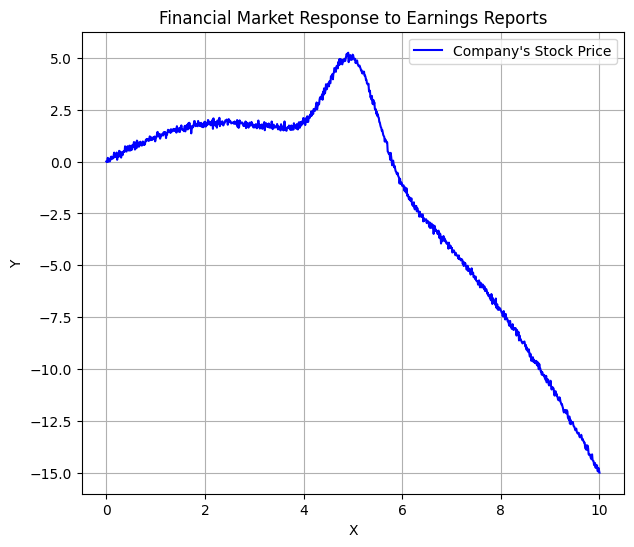

In [5]:
# Step 3: Visualize the dataset
plt.figure(figsize=(7, 6))

# Plot the combined data
plt.plot(x, y, label="Company's Stock Price", color='blue')

# Add labels and title
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

Menampilkan visuaslisasi hubungan X dan Y pada dataset yang sudah di pisah atau diatur, grafik tersebut menggambarkan tren harga sama terhadapa laporan pendapatan

In [6]:
# Model 1: Vanilla Regression (Linear Regression)
vanilla_model = LinearRegression()
vanilla_model.fit(x_train, y_train)
y_pred_vanilla = vanilla_model.predict(x_test)


Melakukan Training Vanilla Regression (Linear Regression) dan prediksi model regressi linear pada data testing

In [7]:
# Model 2: Basis Function Regression (using polynomial features as a basis function example)
from sklearn.preprocessing import PolynomialFeatures

# Menggunakan x sebagai input untuk PolynomialFeatures
poly = PolynomialFeatures(degree=15)

# Transformasi data pelatihan dan pengujian
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

# Melatih model regresi linear pada fitur polinomial
basis_function_model = LinearRegression()
basis_function_model.fit(X_poly_train, y_train)  # Gunakan x_train dan y_train
y_pred_basis = basis_function_model.predict(X_poly_test)  # Gunakan x_test untuk prediksi




Membuat dan training Basis Function Regression dengan menggunakan polynomial feature dengan derajat 15, serta melakukan prediksi pada BFR. Bertujuan untuk meningkatkan akurasi prediksi dengan menggunakan polinomial feature.

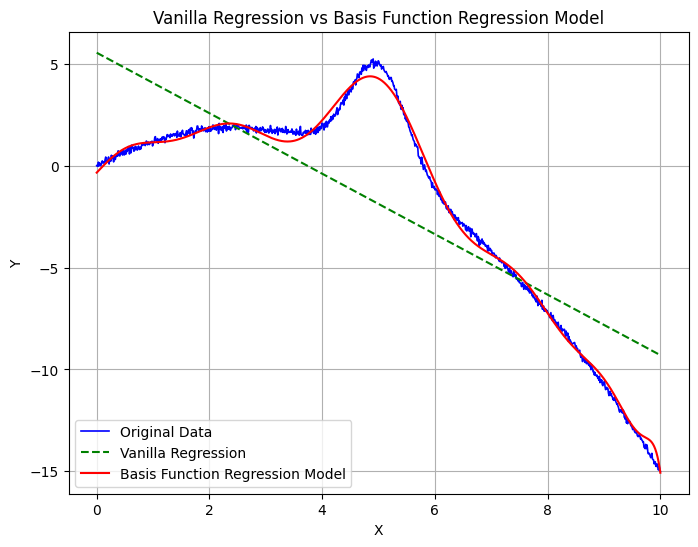

In [11]:
plt.figure(figsize=(8, 6))

# Plot data asli (x dan y)
plt.plot(x, y, label='Original Data', color='blue', linewidth=1.2)

# Plot output Vanilla Regression dengan garis putus-putus warna hijau
y_pred_vanilla_line = vanilla_model.predict(x)
plt.plot(x, y_pred_vanilla_line, label='Vanilla Regression', color='green', linestyle='--')

# Plot output Basis Function Regression dengan garis biasa warna merah
X_poly_full = poly.transform(x)
y_pred_basis_line = basis_function_model.predict(X_poly_full)
plt.plot(x, y_pred_basis_line, label='Basis Function Regression Model', color='red')

# Menambahkan judul, label sumbu, dan grid
plt.title("Vanilla Regression vs Basis Function Regression Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

# Menampilkan keterangan di kiri bawah
plt.legend(loc='lower left')

# Tampilkan plot
plt.show()


Menampilkan hasil visualisasi perbandingan pada vanilla regression dan BFR terhadap original data, Dapat disimpulkan bahwa BFR mampu menangkap hubungan non-linear dengan lebih baik daripada Vanilla Regression. Atau dengan kata lain BFR dapat mengikuti atau mendekati bentuk data dari original data seperti pada hasil gambar visualisasi yang pertama.  

In [144]:
# Evaluasi model
mse_vanilla = mean_squared_error(y_test, y_pred_vanilla)
rmse_vanilla = np.sqrt(mse_vanilla)
r2_vanilla = r2_score(y_test, y_pred_vanilla)

mse_basis = mean_squared_error(y_test, y_pred_basis)
rmse_basis = np.sqrt(mse_basis)
r2_basis = r2_score(y_test, y_pred_basis)

# Print evaluation metrics
print("Vanilla Regression:")
print(f"MSE: {mse_vanilla}, RMSE: {rmse_vanilla}, R^2: {r2_vanilla}")
print("\nBasis Function Regression Model:")
print(f"MSE: {mse_basis}, RMSE: {rmse_basis}, R^2: {r2_basis}")

Vanilla Regression:
MSE: 9.401377787555104, RMSE: 3.0661666274935393, R^2: 0.6781603066194921

Basis Function Regression Model:
MSE: 0.10360230843559659, RMSE: 0.32187312474886215, R^2: 0.9964533565256187


Pada hasil evaluasi MSE RMSE dan R^2 pada Vanila Regression dengan BFR. Dapat disimpulkan bahwa BFR memiliki hasil akurasi lebih baik daripada vanilla regression, karena nilai MSE dan RMSE nya kecil yang berarti nilai errornya lebih kecil, dan pada nilai R^2 memiliki hasil 96% yang berarti model BFR dapat menjelaskan variasi dalam data.